In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target Search Term
target_terms = ["BBC", "CBS", "CNN","Fox","New York times"]

# Variables for holding sentiments
sentiments = []

# List to hold results
results_list = []
    
# Loop through all target news organization
for target in target_terms:
    
     # Counter
    counter = 1

    # Variable for holding the oldest tweet
    oldest_tweet = None
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    # Run search around each target
    public_tweets = api.search(
        target, count=100, result_type ="recent", max_id=oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
                
        # Set the new oldest_tweet value
        oldest_tweet = tweet["id"] - 1
        
        # Add sentiments for each tweet into a list
        sentiments.append({"Organization": target,
                           "Text": tweet["text"],
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets": counter})

        # Add to counter 
        counter += 1

In [5]:
# news_df = pd.DataFrame(results_list).set_index("Organization").round(3)
news_df = pd.DataFrame(sentiments).set_index("Organization")
news_df

,Compound,Date,Negative,Neutral,Positive,Text,Tweets
Organization,,,,,,,
BBC,0.0000,Fri Sep 07 20:27:13 +0000 2018,1.000,0.000,0.000,@xs4all Nieuwe in-browser TV is een flinke ver...,1
BBC,-0.2912,Fri Sep 07 20:27:12 +0000 2018,0.892,0.108,0.000,@Wailway7 @peoplesvote_uk I'm not really sure ...,2
BBC,-0.2732,Fri Sep 07 20:27:12 +0000 2018,0.909,0.091,0.000,RT @pilitaclark: New BBC guidelines for coveri...,3
BBC,0.0000,Fri Sep 07 20:27:12 +0000 2018,1.000,0.000,0.000,BBC News - Spain parishioner botches Jesus and...,4
BBC,0.5346,Fri Sep 07 20:27:10 +0000 2018,0.736,0.061,0.203,RT @simon_reeve: Not convinced by this at all....,5
BBC,-0.3566,Fri Sep 07 20:27:08 +0000 2018,0.850,0.150,0.000,RT @ChrisJSquire: A quick look at some of the ...,6
BBC,0.4588,Fri Sep 07 20:27:08 +0000 2018,0.880,0.000,0.120,RT @thebabblewagon: We told you Boyan Slat was...,7
BBC,0.2500,Fri Sep 07 20:27:08 +0000 2018,0.920,0.000,0.080,RT @MikScarlet: Popped down to BBC to do a qui...,8
BBC,0.2500,Fri Sep 07 20:27:07 +0000 2018,0.917,0.000,0.083,RT @Rainmaker1973: James Burke had only one ch...,9


In [6]:
# Save dataframe to csv file
news_df.to_csv("News.csv", header=True)

In [7]:
# Make new dataframe only contains compound and Tweets data
compound_df = news_df[['Compound', 'Tweets']].reset_index()
compound_df.head()

,Organization,Compound,Tweets
0,BBC,0.0000,1
1,BBC,-0.2912,2
2,BBC,-0.2732,3
3,BBC,0.0000,4
4,BBC,0.5346,5


In [8]:
# Minor Data Munging to Re-Format the Data Frames
compound_df_new = compound_df.pivot(index='Tweets', columns='Organization', values='Compound')
compound_df_new.head()

Organization,BBC,CBS,CNN,Fox,New York times
Tweets,,,,,
1,0.0000,-0.5267,0.7644,0.3612,-0.0258
2,-0.2912,-0.3400,0.0000,-0.6705,0.0000
3,-0.2732,-0.3818,0.0000,0.0000,0.0000
4,0.0000,0.0000,-0.7184,0.3335,0.0000
5,0.5346,0.1280,-0.3384,-0.4767,0.2023


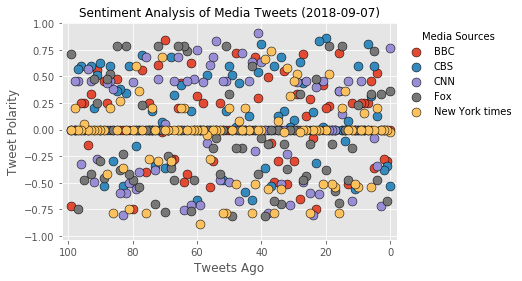

In [9]:
# Create plot
now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.title(f"Sentiment Analysis of Media Tweets ({now})", fontsize = 12)

Tweet_ago = np.arange(0, len(compound_df_new))
plt.xlabel('Tweets Ago', fontsize = 12)
plt.ylabel('Tweet Polarity', fontsize = 12)

[plt.scatter(Tweet_ago, compound_df_new[group], marker = "o", edgecolors="black", s=80) for group in compound_df_new]
plt.ylim(compound_df['Compound'].min()-0.15, compound_df['Compound'].max()+0.1)
plt.xlim(len(compound_df_new)+2, -2)
plt.legend(bbox_to_anchor=(1, 1), frameon=False, title="Media Sources")
plt.savefig("Sentiment Analysis of Media Tweets", bbox_inches='tight')

In [10]:
# Calculate means for compound of each news group
compound_df_new_mean = np.mean(compound_df_new)

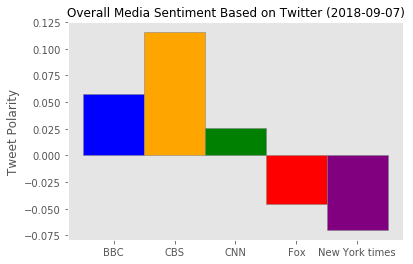

In [11]:
# Plot bar grouph
plt.title(f"Overall Media Sentiment Based on Twitter ({now})", fontsize = 12)
plt.ylabel("Tweet Polarity")

labels = [group for group in compound_df_new]
x_axis = np.arange(len(labels))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,labels)

plt.bar(x_axis, compound_df_new_mean, width = 1, color = ['b', 'orange', 'green', 'red', 'purple'], edgecolor='grey')
plt.grid()
plt.savefig("Overall Media Sentiment Based on Twitter",bbox_inches='tight')

Observable trends based on the data:
1. The tweets from BBC, CBS and CNN news are more positive. The tweets from Fox and New York times are more negative.
2. Peoplen might like BBC, CBC and CNN more than Fox and NY times.
3. Most of the tweets has neutral compound data.